# Marker Determination

In [17]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

sc.settings.n_jobs = -1

In [3]:
import joblib

# Load the RandomForest classifier and the LabelEncoder
# rf_classifier = joblib.load('models/rf_classifier_reproduction.pkl')
# le = joblib.load('models/le_reproduction.pkl')

ovr_classifier = joblib.load('models/ovr_classifier.pkl')

top_features_log_reg = pd.read_csv('spreadsheets/ovr_top_20_genes_by_cell_type_reproduction.csv')

# Only positive features, negative markers are less useful
top_features_log_reg_pos = top_features_log_reg[top_features_log_reg['Coefficient'] > 0]
top_features_log_reg_pos.index = top_features_log_reg_pos.Gene
top_features_log_reg_pos

,Cell Type,Gene,Coefficient
0,AC,Synpr,0.593647
1,AC,Asic2,0.561311
2,AC,Frmd5,0.557747
3,AC,Slc32a1,0.551331
4,AC,Gad1,0.517364
...,...,...,...
475,Rod,Rlbp1,-0.357221
476,Rod,Basp1,-0.345442
477,Rod,Tenm2,-0.342909
478,Rod,Kcnip4,-0.342550


In [18]:
adata = ad.read_h5ad('camr_modeling_input.h5ad')
gene_names = adata.var["feature_name"].astype(str)
if not os.path.isfile('CAMR_genes.csv'):
    adata.var["feature_name"].to_csv('CAMR_genes.csv', index=False)
adata

AnnData object with n_obs × n_vars = 294561 × 2175
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', '

## Major Class Markers

In [19]:
# Now get average normalized expression
feature_expression_pd = pd.DataFrame(adata.X.toarray(), columns = gene_names.tolist())
feature_expression_pd["majorclass"] = adata.obs["majorclass"].tolist()
feature_expression_pd_mean = feature_expression_pd.groupby("majorclass").agg("mean")
feature_expression_pd_mean

,0610038B21Rik,1110018N20Rik,Cstpp1,1190005I06Rik,1600010M07Rik,1700008O03Rik,Zbed5-ps,1700024B18Rik,1700026F02Rik,1700028E10Rik,...,Zfp804a,Zfp804b,Zfpm2,Zfyve28,Zmat4,Zscan22,Zscan29,Zswim5,Zswim6,mt-Nd1
majorclass,,,,,,,,,,,,,,,,,,,,,
AC,0.002055,0.012486,0.327811,0.015076,0.031573,0.026873,0.074107,0.048694,0.002384,0.017070,...,0.753878,0.130790,0.347843,0.070603,0.563353,0.026502,0.008024,0.068429,0.169734,2.625507
Astrocyte,0.001923,0.002642,0.241652,0.056756,0.069539,0.012075,0.020311,0.000524,0.002779,0.102714,...,0.028430,0.072854,0.082421,0.004446,0.150579,0.016944,0.024066,0.029584,1.022675,3.778721
BC,0.002190,0.011202,0.284737,0.414757,0.033815,0.013782,0.143323,0.002164,0.008875,0.037825,...,0.445162,2.645283,0.171855,0.050554,0.060655,0.031935,0.015285,0.221039,0.033238,2.587253
Cone,0.039780,0.070722,0.580797,0.457557,0.040195,0.002395,0.117002,0.000000,0.016956,0.081027,...,0.375079,0.022923,0.001151,0.203100,0.007193,0.053262,0.034780,0.062424,0.140090,2.411744
Endothelial,0.000821,0.009555,0.099780,0.019822,0.080871,0.000191,0.028494,0.000000,0.000000,0.006697,...,0.013574,0.052171,0.006627,0.005596,0.109053,0.024175,0.026268,0.011289,0.593766,1.790518
HC,0.004546,0.000000,0.373574,0.037715,0.011529,0.001831,0.100906,0.000000,0.000906,0.037846,...,1.665950,0.016755,0.842757,0.042900,0.007621,0.014388,0.016305,0.046030,0.390676,2.532812
MG,0.001129,0.003942,0.308912,0.244924,0.054025,0.005507,0.089529,0.000702,0.000716,0.019529,...,0.007969,0.943655,0.598827,0.011441,0.007233,0.019657,0.033096,0.091660,0.511716,2.279193
Microglia,0.001676,0.002152,0.085067,0.013879,0.104027,0.003251,0.021406,0.000000,0.000474,0.015238,...,0.009186,0.010477,0.015539,0.016420,0.012536,0.016033,0.028741,0.012638,0.778234,1.955861
Pericyte,0.000000,0.002633,0.165753,0.022375,0.052971,0.004261,0.022394,0.000712,0.001479,0.004843,...,0.020057,0.084926,0.017342,0.005703,0.496229,0.026052,0.007114,0.028207,0.293976,2.004761


In [22]:
# Raw average expression
highly_variable = adata.raw.var['feature_name'].isin(adata.var['feature_name'])
raw_feature_expression_pd = pd.DataFrame(adata.raw.X[:, highly_variable].toarray(), columns = gene_names.tolist())
raw_feature_expression_pd["majorclass"] = adata.obs["majorclass"].tolist()
raw_feature_expression_pd_mean = raw_feature_expression_pd.groupby("majorclass").agg("mean")
raw_feature_expression_pd_mean

,0610038B21Rik,1110018N20Rik,Cstpp1,1190005I06Rik,1600010M07Rik,1700008O03Rik,Zbed5-ps,1700024B18Rik,1700026F02Rik,1700028E10Rik,...,Zfp804a,Zfp804b,Zfpm2,Zfyve28,Zmat4,Zscan22,Zscan29,Zswim5,Zswim6,mt-Nd1
majorclass,,,,,,,,,,,,,,,,,,,,,
AC,0.003349,0.019452,0.652156,0.024278,0.047349,0.042942,0.122399,0.066284,0.003472,0.028981,...,2.542363,0.420875,0.683476,0.120626,1.571861,0.041341,0.013222,0.113141,0.314727,15.298697
Astrocyte,0.004464,0.005952,0.661458,0.136905,0.210565,0.027530,0.055060,0.001488,0.008185,0.265625,...,0.113095,0.319940,0.223958,0.011905,0.438244,0.045387,0.059524,0.081101,5.067708,87.405502
BC,0.004299,0.020874,0.645807,0.938537,0.066594,0.022611,0.317685,0.004182,0.016736,0.082731,...,1.653916,53.842201,0.505204,0.108138,0.170199,0.056609,0.029896,0.554281,0.076111,16.589417
Cone,0.086938,0.149798,1.670999,1.203068,0.088643,0.005327,0.281909,0.000000,0.033241,0.199659,...,1.230130,0.018112,0.002131,0.532495,0.012785,0.110164,0.080332,0.158747,0.362455,16.475601
Endothelial,0.002600,0.022530,0.264298,0.048527,0.203640,0.000867,0.070191,0.000000,0.000000,0.017331,...,0.035529,0.428943,0.015598,0.006932,0.322357,0.054593,0.058059,0.030329,2.127383,10.772964
HC,0.007937,0.000000,1.063492,0.063492,0.031746,0.007937,0.317460,0.000000,0.007937,0.047619,...,13.349206,0.023810,3.595238,0.087302,0.015873,0.023810,0.047619,0.111111,1.095238,28.095238
MG,0.002957,0.008870,0.930197,0.680936,0.141149,0.012855,0.244633,0.002057,0.001671,0.051420,...,0.017869,5.824785,2.259288,0.025582,0.013626,0.045507,0.084715,0.261730,1.869906,24.976475
Microglia,0.002465,0.003123,0.149573,0.021039,0.166502,0.004109,0.042242,0.000000,0.000822,0.027942,...,0.016272,0.024162,0.025970,0.027449,0.017258,0.026298,0.049638,0.024490,1.905161,8.318048
Pericyte,0.000000,0.004963,0.260546,0.037221,0.071960,0.004963,0.032258,0.002481,0.002481,0.009926,...,0.064516,0.451613,0.049628,0.014888,0.878412,0.037221,0.009926,0.047146,0.560794,7.724566


In [24]:
# Filter based on innate features of the gene itself
in_regression = adata.var["feature_name"].astype(str).isin(top_features_log_reg_pos["Gene"])
pre_filtered = adata.var["feature_is_filtered"] == False # variable genes, none filtered
long_enough = adata.var["feature_length"].astype(int) >= 960 # It's a conservative filter
known_markers = ["Cd74", "Gfap", "Tfap2b", "Rbpms", "Rlbp1", "Onecut1", "Arr3", "Neto1", "Pde6a"]
is_known = adata.var["feature_name"].isin(known_markers)
# with open("mentioned_genes.txt", 'r') as gene_file:
#     mentioned_genes = [gene.strip() for gene in gene_file.readlines()]
# is_mentioned = adata.var["feature_name"].isin(mentioned_genes)

baseline_genes = pre_filtered & long_enough & in_regression
keep_genes = baseline_genes | is_known # | (is_mentioned & baseline_genes) # Refactor? Missing "in top features"
kept_gene_names = gene_names[keep_genes].tolist()
print(len(kept_gene_names), kept_gene_names) # 218 genes still

218 ['6330411D24Rik', 'Abca8a', 'Abhd2', 'Acsl3', 'Adgrl4', 'Aldoc', 'Anks1b', 'Apoe', 'Aqp4', 'Arhgap15', 'Arhgap42', 'Arl15', 'Arr3', 'Asic2', 'Atf3', 'Atp1a2', 'B3galt2', 'Bsg', 'C1qa', 'C1qb', 'C1qc', 'C1ql1', 'Calb1', 'Calb2', 'Cald1', 'Cartpt', 'Ccn1', 'Ccn2', 'Cd52', 'Cd53', 'Cd74', 'Cdh11', 'Cdh18', 'Cdr2', 'Chgb', 'Cldn5', 'Clstn2', 'Clu', 'Cmss1', 'Cnga1', 'Cngb3', 'Col8a1', 'Col9a1', 'Coro1a', 'Creb5', 'Crip1', 'Csmd3', 'Csrp1', 'Ctla2a', 'Ctsd', 'Ctss', 'Ctsz', 'Cxcl14', 'D130079A08Rik', 'Dbi', 'Dkk3', 'Dlc1', 'Dlgap1', 'Dmd', 'Dnajb1', 'Dock4', 'Ebf1', 'Eftud2', 'Egfem1', 'Egr1', 'Epb41', 'Epha6', 'Flt1', 'Fos', 'Fosb', 'Frmd5', 'Frmpd4', 'Gabra1', 'Gabrr2', 'Gad1', 'Galnt18', 'Galntl6', 'Gfap', 'Glra1', 'Glul', 'Gm20754', 'Gm32442', 'Gnat2', 'Gnb3', 'Gng5', 'Gngt1', 'Gngt2', 'Gpr37', 'Gria4', 'Grik1', 'Grik2', 'Grm5', 'Grm6', 'Grm8', 'Gsta4', 'Hexb', 'Hmgn1', 'Hs6st3', 'Hspa1a', 'Id1', 'Igfbp7', 'Il1rapl1', 'Il33', 'Itm2a', 'Junb', 'Kcnd2', 'Kcne2', 'Kctd16', 'Klf2', 'Lap

In [53]:
# Filter based on the filtering criteria
# adata.obs.library_platform.unique() # mix of 4 chemistries...

# count_noncluster = 0.1 # Absolute detection limit
count_noncluster = 0
count_highnoncluster = 4
count_lowcluster = 4
count_highcluster = 100

too_broad_genes = (raw_feature_expression_pd_mean >= count_highnoncluster).sum(axis=0) > 1
detectable_genes = (raw_feature_expression_pd_mean >= count_lowcluster).sum(axis=0) >= 1
optical_crowding_genes = (raw_feature_expression_pd_mean >= count_highcluster).sum(axis=0) > 0

poor_markers = optical_crowding_genes | too_broad_genes
is_expression_candidate = detectable_genes & (~poor_markers)

gene_names.index = is_expression_candidate.index # necessary step apparently
expression_candidates = gene_names[is_expression_candidate].tolist()
print(len(expression_candidates), expression_candidates) # 281

281 ['4930447C04Rik', 'Abca8a', 'Abcb1a', 'Abcc9', 'Abcg2', 'Acsl3', 'Adamtsl1', 'Adgrl4', 'Aipl1', 'Anks1b', 'Aqp4', 'Arhgap15', 'Arhgap31', 'Arl15', 'Arr3', 'Atp10a', 'Atp1a2', 'Atrnl1', 'C130073E24Rik', 'C1qa', 'C1qb', 'C1qc', 'Cabp5', 'Cacna2d1', 'Cacna2d3', 'Cacnb2', 'Calb1', 'Calb2', 'Car2', 'Ccdc141', 'Ccl12', 'Ccl3', 'Ccl4', 'Cd74', 'Cdk14', 'Cdkn1a', 'Cfh', 'Chgb', 'Cldn10', 'Cldn5', 'Clic4', 'Cngb3', 'Cntn4', 'Cntn5', 'Col23a1', 'Col8a1', 'Col9a1', 'Cox4i2', 'Cox8b', 'Crb1', 'Creb5', 'Crim1', 'Crym', 'Csf1r', 'Csrp1', 'Ctla2a', 'Ctss', 'Ctsz', 'Cx3cr1', 'Cxcl12', 'Cyba', 'Dach1', 'Dapl1', 'Dct', 'Dnajb1', 'Dscam', 'Dscaml1', 'Eftud2', 'Egfem1', 'Emcn', 'Eng', 'Enpp2', 'Epb41', 'Epb41l2', 'Espn', 'Fabp5', 'Fam135b', 'Fcer1g', 'Fgf13', 'Fgf14', 'Fli1', 'Fosb', 'Frmd3', 'Frmd4b', 'Frmd5', 'Frmpd4', 'Fstl5', 'Fxyd7', 'Gadd45g', 'Galnt18', 'Galntl6', 'Gfap', 'Gm11906', 'Gm20754', 'Gm30382', 'Gm32442', 'Gm44196', 'Gm4792', 'Gnat1', 'Gnat2', 'Gnb1', 'Gng11', 'Gng13', 'Gngt2', 'Gpr37

In [51]:
final_candidates = np.intersect1d(expression_candidates, kept_gene_names)
print(len(final_candidates), final_candidates) # 113

113 ['Abca8a' 'Acsl3' 'Adgrl4' 'Anks1b' 'Aqp4' 'Arhgap15' 'Arl15' 'Arr3'
 'Atp1a2' 'C1qa' 'C1qb' 'C1qc' 'Calb1' 'Calb2' 'Cd74' 'Chgb' 'Cldn5'
 'Cngb3' 'Col8a1' 'Col9a1' 'Creb5' 'Csrp1' 'Ctla2a' 'Ctss' 'Ctsz' 'Dnajb1'
 'Eftud2' 'Egfem1' 'Epb41' 'Fosb' 'Frmd5' 'Frmpd4' 'Galnt18' 'Galntl6'
 'Gfap' 'Gm20754' 'Gm32442' 'Gnat2' 'Gngt2' 'Gpr37' 'Grik1' 'Grm5' 'Hexb'
 'Hs6st3' 'Id1' 'Il1rapl1' 'Il33' 'Itm2a' 'Kcnd2' 'Kctd16' 'Laptm5'
 'Lrfn2' 'Ly6a' 'Ly6c1' 'Ly86' 'Mecom' 'Megf11' 'Mlc1' 'Mt3' 'Myl9' 'Mylk'
 'Ndrg1' 'Ndufa4l2' 'Nefl' 'Nefm' 'Nrn1' 'Opn1mw' 'Opn1sw' 'Pals2' 'Pde3a'
 'Pde6c' 'Pde6h' 'Pdgfrb' 'Plcb1' 'Plcl1' 'Ppp1r15a' 'Ptprb' 'Ptprk'
 'Ptprm' 'Ptprz1' 'Rbms3' 'Rbp1' 'Rbp3' 'Rbpms' 'Rdh5' 'Rgr' 'Rgs3' 'Rho'
 'Rp1' 'Rpe65' 'Rtbdn' 'Ryr3' 'S100b' 'Samsn1' 'Slc16a1' 'Slc16a8'
 'Slc24a2' 'Slco1a4' 'Slit2' 'Spc25' 'Stmn2' 'Tenm3' 'Tfap2b' 'Thsd7b'
 'Thy1' 'Tm4sf1' 'Trem2' 'Trpm1' 'Ttyh1' 'Vcl' 'Vwc2' 'Wwtr1' 'Zswim6']


/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


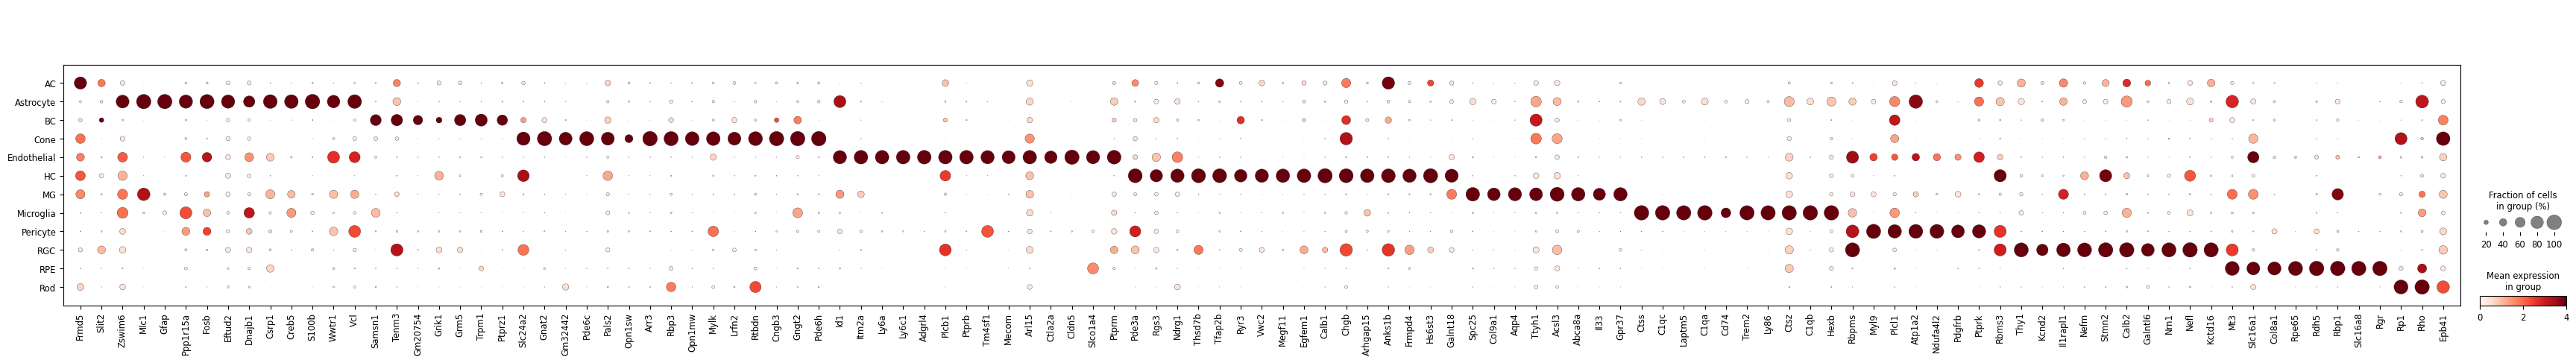

In [60]:
final_candidates_ordered = feature_expression_pd_mean[final_candidates].idxmax().sort_values()
sc.pl.dotplot(adata,
              final_candidates_ordered.index,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

In [62]:
# Save all genes that passed these thresholds
raw_feature_expression_pd_mean[final_candidates_ordered.index].to_csv('spreadsheets/raw_majorclass_mean_expression.csv')
feature_expression_pd_mean[final_candidates_ordered.index].to_csv('spreadsheets/normalized_majorclass_mean_expression.csv')

In [56]:
feature_cell = feature_expression_pd_mean[final_candidates].idxmax()
marker_expression_mean = [feature_expression_pd_mean[final_candidates].T.loc[row, feature_cell[i]] for i, row in enumerate(feature_expression_pd_mean[final_candidates].T.index)]
top3markers = pd.DataFrame([marker_expression_mean, final_candidates, feature_cell]).T.sort_values(0).groupby(2).tail(3)[1].tolist()
print(len(top3markers), top3markers)

/tmp/ipykernel_146948/1262579833.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marker_expression_mean = [feature_expression_pd_mean[final_candidates].T.loc[row, feature_cell[i]] for i, row in enumerate(feature_expression_pd_mean[final_candidates].T.index)]
/tmp/ipykernel_146948/1262579833.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marker_expression_mean = [feature_expression_pd_mean[final_candidates].T.loc[row, feature_cell[i]] for i, row in enumerate(feature_expression_pd_mean[final_candidates].T.index)]
/tmp/ipykernel_146948/1262579833.py:2: FutureWarning: Series.__getitem__ treating keys as position

(35,
 ['Slit2',
  'Grm5',
  'Frmd5',
  'Samsn1',
  'Epb41',
  'Trpm1',
  'Abca8a',
  'Eftud2',
  'Thy1',
  'Itm2a',
  'Plcl1',
  'Spc25',
  'Ly6c1',
  'Thsd7b',
  'Acsl3',
  'Atp1a2',
  'Myl9',
  'S100b',
  'Gfap',
  'Nefl',
  'Hs6st3',
  'Rp1',
  'Cldn5',
  'Calb1',
  'Calb2',
  'Gngt2',
  'Arr3',
  'C1qa',
  'Rdh5',
  'Hexb',
  'Ctss',
  'Rbp1',
  'Pde6h',
  'Rho',
  'Rgr'])

/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


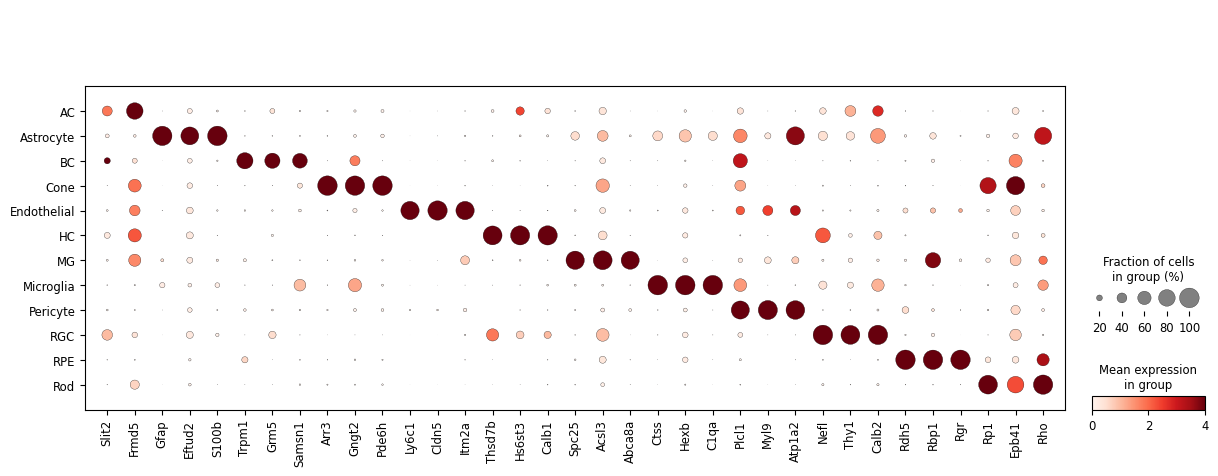

In [61]:
final_candidates_ordered_3 = feature_expression_pd_mean[top3markers].idxmax().sort_values()
sc.pl.dotplot(adata,
              final_candidates_ordered_3.index,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_top3_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

### Additional Inspection

In [71]:
# count_lowcluster = 4
# count_highcluster = 100

features = raw_feature_expression_pd_mean.columns
detectable_genes = features[(raw_feature_expression_pd_mean >= count_lowcluster).sum(axis=0) >= 1]
optical_crowding_genes = features[(raw_feature_expression_pd_mean >= count_highcluster).sum() > 0]

detectable_range_genes = np.setdiff1d(detectable_genes, optical_crowding_genes)

long_enough = adata.var['feature_name'][adata.var["feature_length"].astype(int) >= 960] # It's a conservative filter
candidates = np.intersect1d(long_enough, detectable_range_genes)

final_candidates = np.intersect1d(top_features_log_reg_pos.Gene.tolist(), candidates)
print(len(final_candidates), final_candidates) # 172 if we remove some of the intricacies

172 ['Abca8a' 'Acsl3' 'Adgrl4' 'Aldoc' 'Anks1b' 'Aqp4' 'Arhgap15' 'Arl15'
 'Arr3' 'Asic2' 'Atf3' 'Atp1a2' 'Bsg' 'C1qa' 'C1qb' 'C1qc' 'C1ql1' 'Calb1'
 'Calb2' 'Cald1' 'Cartpt' 'Ccn1' 'Cdh18' 'Chgb' 'Cldn5' 'Clu' 'Cmss1'
 'Cngb3' 'Col8a1' 'Col9a1' 'Creb5' 'Crip1' 'Csrp1' 'Ctla2a' 'Ctsd' 'Ctss'
 'Ctsz' 'Dbi' 'Dkk3' 'Dlc1' 'Dlgap1' 'Dmd' 'Dnajb1' 'Dock4' 'Ebf1'
 'Eftud2' 'Egfem1' 'Egr1' 'Epb41' 'Flt1' 'Fos' 'Fosb' 'Frmd5' 'Frmpd4'
 'Galnt18' 'Galntl6' 'Gfap' 'Glul' 'Gm20754' 'Gm32442' 'Gnat2' 'Gnb3'
 'Gng5' 'Gngt1' 'Gngt2' 'Gpr37' 'Gria4' 'Grik1' 'Grm5' 'Hexb' 'Hmgn1'
 'Hs6st3' 'Hspa1a' 'Id1' 'Igfbp7' 'Il1rapl1' 'Il33' 'Itm2a' 'Junb' 'Kcnd2'
 'Kctd16' 'Klf2' 'Laptm5' 'Lrfn2' 'Ly6a' 'Ly6c1' 'Ly86' 'Marchf1' 'Mecom'
 'Megf11' 'Mfge8' 'Mgp' 'Mlc1' 'Mt3' 'Myl9' 'Mylk' 'Nckap5' 'Ndrg1'
 'Ndufa4l2' 'Nebl' 'Nefl' 'Nefm' 'Nrn1' 'Opn1mw' 'Opn1sw' 'Pals2' 'Pcdh15'
 'Pcdh9' 'Pcp4' 'Pde3a' 'Pde6c' 'Pde6g' 'Pde6h' 'Pdgfrb' 'Plcb1' 'Plcl1'
 'Pltp' 'Ppp1r15a' 'Prdx6' 'Prkg1' 'Ptprb' 'Ptprk' 'Ptprm' 'Ptpr

In [72]:
final_candidates_ordered = feature_expression_pd_mean[final_candidates].idxmax().sort_values().index
heatmap_subset = feature_expression_pd_mean[final_candidates_ordered]
heatmap_values = (heatmap_subset - heatmap_subset.mean(axis=None)) / heatmap_subset.std(axis=None)
heatmap_values

/tmp/ipykernel_146948/651162452.py:3: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  heatmap_values = (heatmap_subset - heatmap_subset.mean(axis=None)) / heatmap_subset.std(axis=None)


,Asic2,Frmd5,Slit2,Crip1,Csrp1,Nckap5,Mlc1,Dbi,Dnajb1,Eftud2,...,Col8a1,Rlbp1,Hmgn1,Rho,Rp1,Pde6g,Sag,Marchf1,Epb41,Gngt1
majorclass,,,,,,,,,,,,,,,,,,,,,
AC,2.456497,2.660355,1.262567,-0.712906,-1.076406,0.308813,-0.686791,0.003650,-0.654563,-0.552120,...,-0.763429,-0.349175,0.683380,-0.299317,-0.480742,-0.367209,-0.228855,-0.378452,-0.314444,-0.277963
Astrocyte,-0.375453,-0.726772,-1.486818,2.229513,2.353340,1.925794,2.482254,2.582294,1.894644,2.886375,...,-0.700452,1.118157,1.224640,0.436243,-0.432807,0.101602,-0.034300,-0.377363,-0.519929,0.021028
BC,0.595067,-0.470320,0.176538,-0.713993,-1.104468,0.187007,-0.686249,-0.122664,-0.847914,-0.587907,...,-0.679076,-0.351162,1.376753,-0.307150,-0.483093,-0.303112,-0.230862,-0.344191,0.490023,0.454538
Cone,-0.564132,0.491772,-1.821918,-0.710986,-1.112014,-0.692560,-0.687606,-0.203202,-0.821130,-0.566794,...,-0.809468,-0.350858,2.753842,-0.226521,0.754218,2.103030,2.044568,2.110739,2.244932,2.089933
Endothelial,-0.470372,0.294262,-1.709453,0.812535,-0.130112,-0.675259,-0.675915,0.078805,0.333000,-0.500672,...,-0.656277,-0.274076,0.195820,-0.260394,-0.438314,-0.357237,-0.257309,-0.404014,-0.181956,-0.284453
HC,0.070521,0.550576,-1.317702,-0.715550,-1.097561,-0.693957,-0.683793,-0.065710,-0.724211,-0.527857,...,-0.810615,-0.358500,0.282119,-0.160428,-0.474476,-0.313286,-0.234969,-0.403850,-0.465191,-0.232505
MG,-0.524981,0.209839,-1.680480,-0.292514,0.012628,1.854337,1.065443,2.185848,-0.813354,-0.577427,...,-0.792785,2.013204,0.958372,0.003490,-0.368494,-0.207433,-0.118159,-0.337190,-0.116911,-0.096841
Microglia,-0.520613,-0.802814,-1.791339,-0.445378,-0.891005,-0.707533,-0.570400,0.135487,1.706959,-0.628177,...,-0.809229,-0.281172,0.189189,0.171421,-0.461471,-0.138955,-0.128562,-0.122685,-0.475247,-0.170976
Pericyte,-0.213110,-0.796581,-1.681324,1.303182,-0.579147,-0.616905,-0.688907,0.098694,-0.030217,-0.504823,...,-0.176777,-0.320591,0.587417,-0.246884,-0.457446,-0.341481,-0.249434,-0.406932,0.006226,-0.268097


### Why are some marker values so weird???

In [90]:
gene_of_interest = "Rbpms"

In [91]:
# logistic regression coefficient is top 20 in one classes
top_features_log_reg_pos.loc[gene_of_interest]

Cell Type           RGC
Gene              Rbpms
Coefficient    0.999984
Name: Rbpms, dtype: object

In [92]:
# However, baseline normalized expression of this gene is highest 
feature_expression_pd_mean[final_candidates].idxmax()[gene_of_interest]

'Pericyte'

In [93]:
# All normalized expression by cell class
feature_expression_pd_mean[gene_of_interest]

majorclass
AC             0.025499
Astrocyte      0.253150
BC             0.001813
Cone           0.005139
Endothelial    0.928085
HC             0.058780
MG             0.128279
Microglia      0.499584
Pericyte       1.304979
RGC            1.273547
RPE            0.020039
Rod            0.017174
Name: Rbpms, dtype: float32

In [94]:
# All raw expression by cell class
raw_feature_expression_pd_mean[gene_of_interest]

majorclass
AC             0.031566
Astrocyte      0.790179
BC             0.002036
Cone           0.005966
Endothelial    3.535529
HC             0.126984
MG             0.393495
Microglia      0.943623
Pericyte       3.253102
RGC            6.022923
RPE            0.038462
Rod            0.009953
Name: Rbpms, dtype: float32

In [95]:
# All Z-transformed normalized expression by cell class
heatmap_values[gene_of_interest]

majorclass
AC            -0.654350
Astrocyte     -0.204864
BC            -0.701117
Cone          -0.694551
Endothelial    1.127765
HC            -0.588638
MG            -0.451416
Microglia      0.281709
Pericyte       1.871926
RGC            1.809864
RPE           -0.665132
Rod           -0.670788
Name: Rbpms, dtype: float32

In [83]:
for reg, Z in zip(top_features_log_reg_pos.loc[final_candidates]["Cell Type"].index, feature_expression_pd_mean[final_candidates].idxmax().index):
    print(reg == Z)

True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [84]:
for reg, Z in zip(top_features_log_reg_pos.loc[final_candidates]["Cell Type"].index, feature_expression_pd_mean[final_candidates].idxmax().index):
    print(reg, Z)

Abca8a Abca8a
Acsl3 Acsl3
Adgrl4 Adgrl4
Aldoc Aldoc
Anks1b Anks1b
Aqp4 Aqp4
Arhgap15 Arhgap15
Arl15 Arl15
Arr3 Arr3
Asic2 Asic2
Atf3 Atf3
Atp1a2 Atp1a2
Bsg Bsg
Bsg C1qa
C1qa C1qb
C1qb C1qc
C1qc C1ql1
C1ql1 Calb1
C1ql1 Calb2
Calb1 Cald1
Calb2 Cartpt
Cald1 Ccn1
Cartpt Cdh18
Ccn1 Chgb
Cdh18 Cldn5
Chgb Clu
Cldn5 Cmss1
Clu Cngb3
Cmss1 Col8a1
Cngb3 Col9a1
Col8a1 Creb5
Col9a1 Crip1
Creb5 Csrp1
Crip1 Ctla2a
Csrp1 Ctsd
Ctla2a Ctss
Ctsd Ctsz
Ctss Dbi
Ctsz Dkk3
Dbi Dlc1
Dkk3 Dlgap1
Dlc1 Dmd
Dlgap1 Dnajb1
Dmd Dock4
Dnajb1 Ebf1
Dock4 Eftud2
Ebf1 Egfem1
Ebf1 Egr1
Eftud2 Epb41
Egfem1 Flt1
Egr1 Fos
Epb41 Fosb
Flt1 Frmd5
Fos Frmpd4
Fosb Galnt18
Frmd5 Galntl6
Frmpd4 Gfap
Galnt18 Glul
Galntl6 Gm20754
Gfap Gm32442
Glul Gnat2
Gm20754 Gnb3
Gm32442 Gng5
Gnat2 Gngt1
Gnb3 Gngt2
Gng5 Gpr37
Gngt1 Gria4
Gngt2 Grik1
Gpr37 Grm5
Gria4 Hexb
Grik1 Hmgn1
Grm5 Hs6st3
Hexb Hspa1a
Hmgn1 Id1
Hs6st3 Igfbp7
Hspa1a Il1rapl1
Id1 Il33
Igfbp7 Itm2a
Igfbp7 Junb
Il1rapl1 Kcnd2
Il33 Kctd16
Itm2a Klf2
Junb Laptm5
Kcnd2 Lrfn2
Kctd16 

In [65]:
heatmap_values.to_csv('spreadsheets/normalized_majorclass_Z_expression.csv')

/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


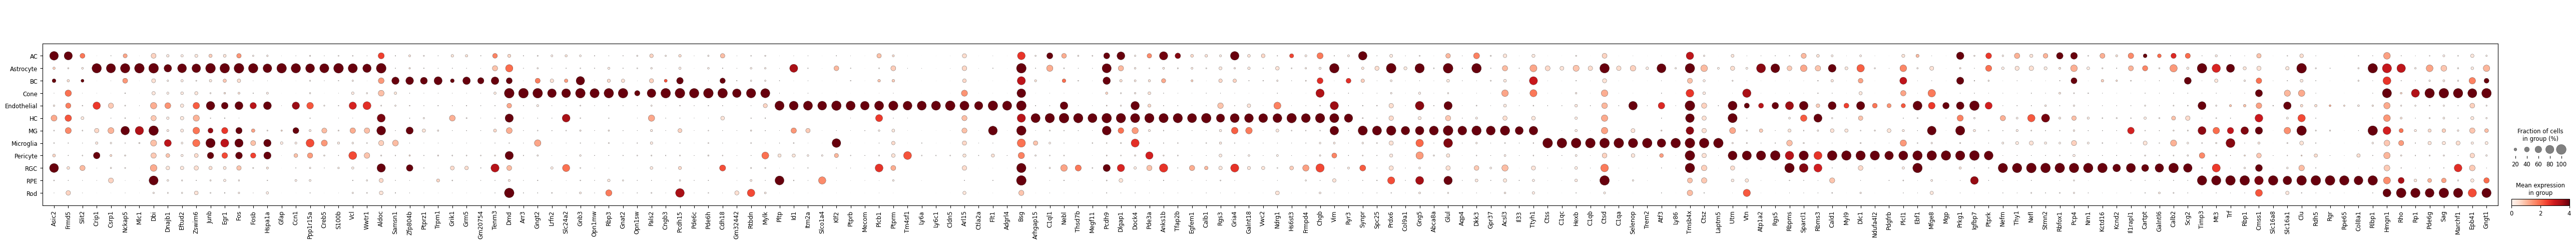

In [67]:
sc.pl.dotplot(adata,
              final_candidates_ordered,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_length-detection-logistic_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/appl/python-3.11/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


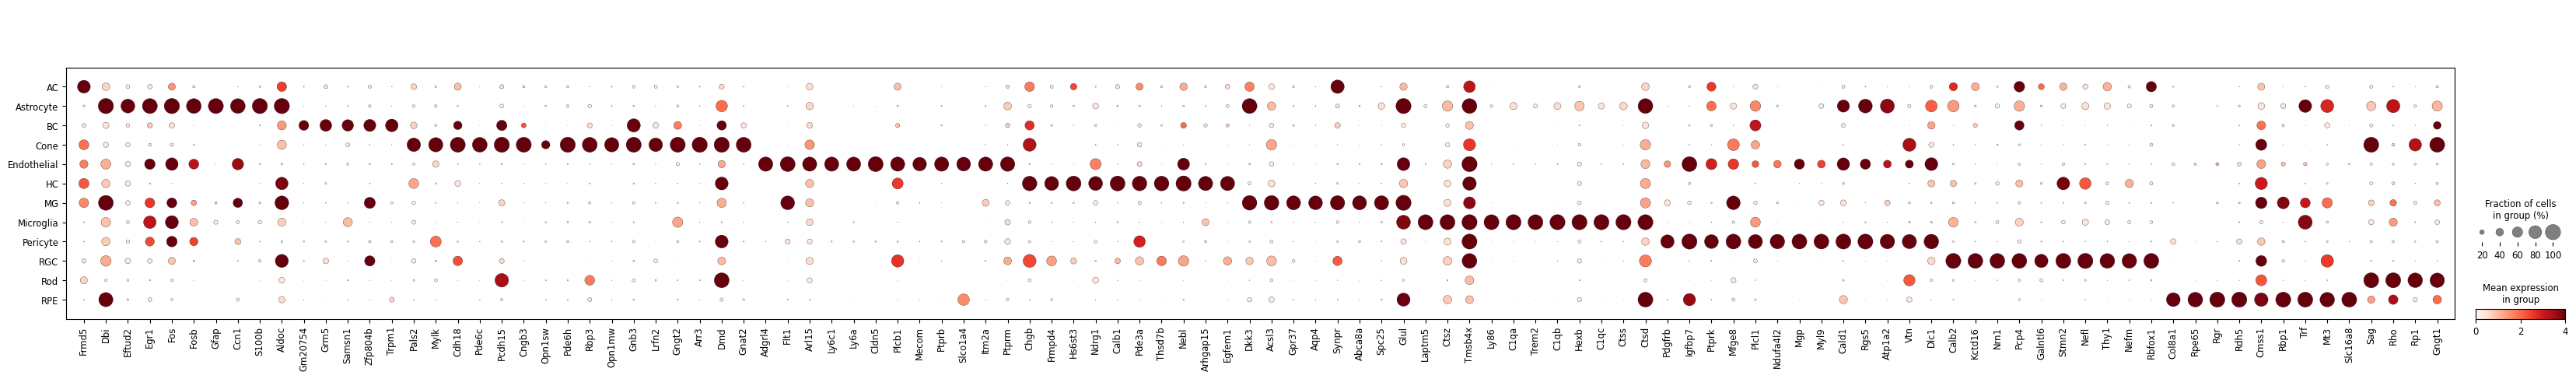

In [68]:
Zthres25 = heatmap_values.columns[((heatmap_values >= 2.5).sum(axis=0) == 1)]
final_candidates_ordered_Z25 = feature_expression_pd_mean[Zthres25].idxmax().sort_values().index
sc.pl.dotplot(adata,
              final_candidates_ordered_Z25,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_length-detection-logistic_Z2.5_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

## Subtype Markers

In [ ]:
top_features_log_reg_sub = pd.read_csv('spreadsheets/ovr_top_20_genes_by_sub_cell_type.csv')

In [ ]:
top_features_log_reg_pos_sub = top_features_log_reg[top_features_log_reg['Coefficient'] > 0]
top_features_log_reg_pos_sub

In [ ]:
where_genes = adata.var["feature_name"].astype(str).isin(top_features_log_reg_pos["Gene"])
gene_names = adata.var["feature_name"].astype(str)[where_genes]

In [ ]:
# Now get average expression and percent expressed
feature_expression_pd_sub = pd.DataFrame(adata.X[:, where_genes].toarray(), columns=adata.vars['feature_name'][where_genes].tolist())
feature_expression_pd_sub["majorclass"] = adata.obs["majorclass"].tolist()
feature_expression_pd_sub_mean = feature_expression_pd_sub.groupby("majorclass").agg("mean")

In [ ]:
# Raw reads
highly_variable = adata.raw.var['feature_name'].isin(adata.var['feature_name'])
raw_feature_expression_pd_sub = pd.DataFrame(adata.raw.X[:, highly_variable].toarray())
raw_feature_expression_pd_sub["majorclass"] = adata.obs["majorclass"].tolist()
raw_feature_expression_pd_sub_mean = raw_feature_expression_pd_sub.groupby("majorclass").agg("mean")
raw_feature_expression_pd_sub_mean.columns = adata.var["feature_name"].astype(str) # gene_names.tolist()

In [ ]:
# Filter based on innate features of the gene itself
pre_filtered = adata.var["feature_is_filtered"] == False # variable genes, none filtered
long_enough = adata.var["feature_length"].astype(int) >= 960 # It's a conservative filter
is_known = adata.var["feature_name"].isin(known_markers)
with open("mentioned_genes.txt", 'r') as f:
    mentioned_genes = f.readlines()
mentioned_genes = [gene.strip() for gene in mentioned_genes]
is_mentioned = adata.var["feature_name"].isin(mentioned_genes)

keep_genes = (pre_filtered & long_enough) | is_mentioned
kept_gene_names = adata.var["feature_name"][keep_genes].tolist()
kept_gene_names # 2049 genes still

In [ ]:
# Filter based on the filtering criteria
# adata.obs.library_platform.unique() # mix of 4 chemistries...
count_noncluster = 0.1
count_highnoncluster = 4
count_lowcluster = 4
count_highcluster = 100

features = raw_feature_expression_pd_mean.columns
too_broad_genes = features[(raw_feature_expression_pd_mean >= count_highnoncluster).sum(axis=0) > 1]
detectable_genes = features[(raw_feature_expression_pd_mean >= count_lowcluster).sum(axis=0) >= 1]
optical_crowding_genes = features[(raw_feature_expression_pd_mean >= count_highcluster).sum() > 0]

poor_markers = np.union1d(optical_crowding_genes, too_broad_genes)
expression_candidates = np.setdiff1d(detectable_genes, poor_markers)
print(len(expression_candidates), expression_candidates)

In [ ]:
final_candidates = np.intersect1d(expression_candidates, kept_gene_names)
print(len(final_candidates), final_candidates)

In [ ]:
final_candidates_ordered = raw_feature_expression_pd_mean[final_candidates].idxmax().sort_values()
sc.pl.dotplot(adata,
              final_candidates_ordered.index,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

In [ ]:
feature_cell = raw_feature_expression_pd_mean[final_candidates].idxmax()
marker_expression_mean = [raw_feature_expression_pd_mean[final_candidates].T.loc[row, feature_cell[i]] for i, row in enumerate(raw_feature_expression_pd_mean[final_candidates].T.index)]
top3markers = pd.DataFrame([marker_expression_mean, final_candidates, feature_cell]).T.sort_values(0).groupby(2).tail(3)[1].tolist()
top3markers

In [ ]:
final_candidates_ordered = raw_feature_expression_pd_mean[top3markers].idxmax().sort_values()
sc.pl.dotplot(adata,
              final_candidates_ordered.index,
              gene_symbols="feature_name",
              groupby = 'majorclass',
              categories_order = ['AC', 'Astrocyte', 'BC', 'Cone', 'Endothelial', 'HC', 'MG', 'Microglia', 'Pericyte', 'RGC', 'RPE', 'Rod'],
              vmax = count_highnoncluster,
              vmin = 0,
              save = f"mouseRetina_filteredCounts_top3_" +
                     f"{count_noncluster}-{count_highnoncluster}count{count_lowcluster}-{count_highcluster}.png")

In [ ]:
raw_feature_expression_pd_mean.to_csv('spreadsheets/raw_majorclass_mean_expression.csv')

In [ ]:
feature_expression_pd = pd.DataFrame(adata.X[:, adata.var["feature_name"].isin(final_candidates)].toarray(), columns=adata.var["feature_name"][adata.var["feature_name"].isin(final_candidates)])
feature_expression_pd["majorclass"] = adata.obs["majorclass"].tolist()
feature_expression_pd_mean = feature_expression_pd.groupby("majorclass").agg("mean")

In [ ]:
feature_expression_pd_mean.to_csv('spreadsheets/normalized_majorclass_mean_expression.csv')